Average color of randomly selected pixels

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio
import random

Import modules

In [ ]:
def getColor(frame):
    height, width, depth = frame.shape
    sample_num = height * width // 100 # 1 precent
    frame_colors = []
    for n in range(sample_num):
        y = random.randint(0, int(height)-1)
        x = random.randint(0, int(width)-1)
     #   print(y,x)
        color = frame[y,x]
      #  print(color)
        
        frame_colors.append(color)
   # print(frame_colors)
    return frame_colors

In [41]:
def avrg(alist):
    red_total = 0 
    green_total = 0
    blue_total = 0
    for x in alist:
        #print(x)
        red = x[0] ; green = x[1] ; blue = x[2]
        #print(red,green,blue)
        red_total += red ; green_total += green ; blue_total += blue
    red = red_total // len(alist)
    green = green_total // len(alist)
    blue = blue_total // len(alist)
    return [red, green, blue]

In [ ]:
filename='C:\\Users\\Hanrabong\\DESKTOP\\highlight.mp4'
cap = cv2.VideoCapture(filename) 
CList = []

'filename' is the path of the video.
'cv2.VideoCapture()' captures the video and is saved as cap
Blank CList is where the colors of each frames will be added

In [ ]:
while(True): 
    #print('hi')
    ret, frame = cap.read()
    #print('suc')
    if ret == False:
        break 
    
  
    CList.append(avrg(getColor(frame)))

In [ ]:
cap.release()
barcode = np.zeros((1000,len(CList),3)) 

'barcode' is a numpy array of a three demensional matrix; 1000 by length of CList a.k.a number of frames by 3 (rgb).

In [31]:
for i in range(len(CList)):
    barcode[:,i] = CList[i]

In [32]:
b, g, r = cv2.split(barcode)   
barcode2 = cv2.merge([r,g,b]) 
barcode2 = barcode2.astype(np.uint8) 

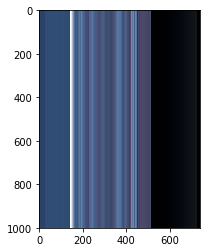

In [42]:
plt.imshow(barcode)
plt.show()

imageio.imwrite('highlight_randomandavg.png', barcode)

cv2.destroyAllWindows()
